In [1]:
import pandas as pd
df = pd.read_excel(open('/Users/ymzhang/Desktop/city_pressure1.xlsx','rb'), sheetname='Sheet0')

In [5]:
df.rename(columns={'full_name':'city'}, inplace=True)

In [2]:
df.columns

Index(['order_date', 'full_name', 'grid_id', 'grid_name', 'pressure_ratio',
       'pressure_ratio_90', 'pressure_ratio_75', 'rider_load', 'rider_load_90',
       'rider_load_75', 'eleme_order_cnt', 'tracking_order_cnt',
       'completion_cnt', 'time_cost', 'overtime_cnt', 'overtime_cnt_40',
       'cancel_order_cnt', 'fraud_cnt', 'completion_rate', 'overtime_rate',
       'overtime_rate_40', 'cancel_rate'],
      dtype='object')

In [9]:
names=['order_date','city','grid_id','rider_load_90','time_cost','completion_rate','overtime_rate','overtime_rate_40','cancel_rate']
names1=['rider_load_90','time_cost','completion_rate','overtime_rate','overtime_rate_40','cancel_rate']

In [46]:
df1=df[names]
df2=df[names1]

In [47]:
df3=df1.dropna()

In [48]:
from sklearn.ensemble import IsolationForest
import numpy as np
rng = np.random.RandomState(42)
clf=IsolationForest(max_samples=100,random_state=rng)
clf.fit(df3[names1])
df1_pred=clf.predict(df3[names1])
pred=pd.Series(df1_pred)

In [49]:
pred.value_counts()

 1    61378
-1     6820
dtype: int64

In [50]:
df3['cluster']=pred

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
df3

,order_date,city,grid_id,rider_load_90,time_cost,completion_rate,overtime_rate,overtime_rate_40,cancel_rate,cluster
0,2017-04-19,合肥市,2,3.600000,2062.673529,0.991228,0.023599,0.333333,0.000000,1.0
1,2017-04-04,合肥市,2,2.000000,1677.245283,0.995283,0.009479,0.127962,0.000000,1.0
2,2017-04-16,合肥市,2,3.125000,1964.772036,1.000000,0.003049,0.256098,0.000000,1.0
3,2017-04-07,合肥市,2,4.300000,2220.618384,0.972826,0.019553,0.388268,0.002717,1.0
4,2017-04-13,合肥市,2,2.782609,1974.260726,0.986928,0.009934,0.251656,0.003268,1.0
5,2017-03-29,合肥市,2,3.476190,2022.850153,0.990854,0.003077,0.286154,0.003049,1.0
6,2017-04-10,合肥市,2,3.333333,2106.097484,0.996865,0.003145,0.333333,0.000000,1.0
7,2017-03-26,合肥市,2,3.619048,2029.592593,0.993289,0.003378,0.287162,0.006711,1.0
8,2017-04-01,合肥市,2,3.000000,1932.418239,0.981481,0.009434,0.242138,0.000000,1.0
9,2017-04-09,合肥市,2,4.210526,2315.689231,0.978852,0.021605,0.487654,0.009063,1.0


In [52]:
index = [i for i,x in enumerate(pred) if x == 1]
df4=df3.ix[index]

In [54]:
df5=df4.ix[((df4.rider_load_90<1.5)&(df4.rider_load_90>0.1)&(df4.overtime_rate<=0.5)&(df4.cancel_rate<=0.2)) ,]

In [55]:
df5[names1].describe()

,rider_load_90,time_cost,completion_rate,overtime_rate,overtime_rate_40,cancel_rate
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,1.247708,1591.291102,0.974550,0.012438,0.083747,0.001184
std,0.231948,241.533015,0.063241,0.027777,0.087455,0.004212
min,0.126087,784.000000,0.293478,0.000000,0.000000,0.000000
25%,1.150000,1425.405405,0.977528,0.000000,0.029630,0.000000
50%,1.311111,1572.477612,0.993590,0.000000,0.060606,0.000000
75%,1.417647,1714.128205,1.000000,0.014925,0.107143,0.000000
max,1.498333,4169.000000,1.000000,0.300000,1.000000,0.061224


In [56]:
df5_beijing=df5.ix[(df5.city=='北京市'),]

In [57]:
import seaborn as sns
%matplotlib inline

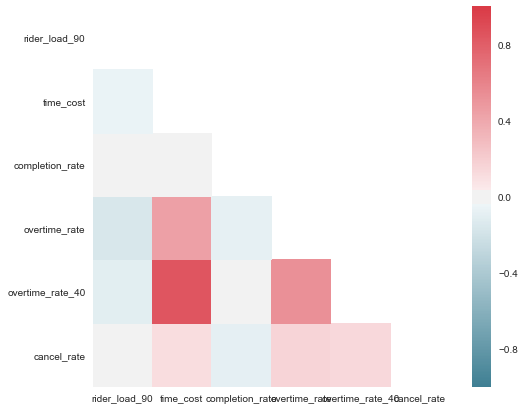

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
# Generate a large random dataset
d = pd.DataFrame(data=df5,columns=names1)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8,7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap)
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
#            square=True, xticklabels=5, yticklabels=5,
#            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [59]:
corr

,rider_load_90,time_cost,completion_rate,overtime_rate,overtime_rate_40,cancel_rate
rider_load_90,1.000000,-0.059441,0.012584,-0.160814,-0.107896,-0.019657
time_cost,-0.059441,1.000000,-0.018379,0.438376,0.851201,0.114397
completion_rate,0.012584,-0.018379,1.000000,-0.083900,-0.031831,-0.087573
overtime_rate,-0.160814,0.438376,-0.083900,1.000000,0.525044,0.163020
overtime_rate_40,-0.107896,0.851201,-0.031831,0.525044,1.000000,0.134381
cancel_rate,-0.019657,0.114397,-0.087573,0.163020,0.134381,1.000000


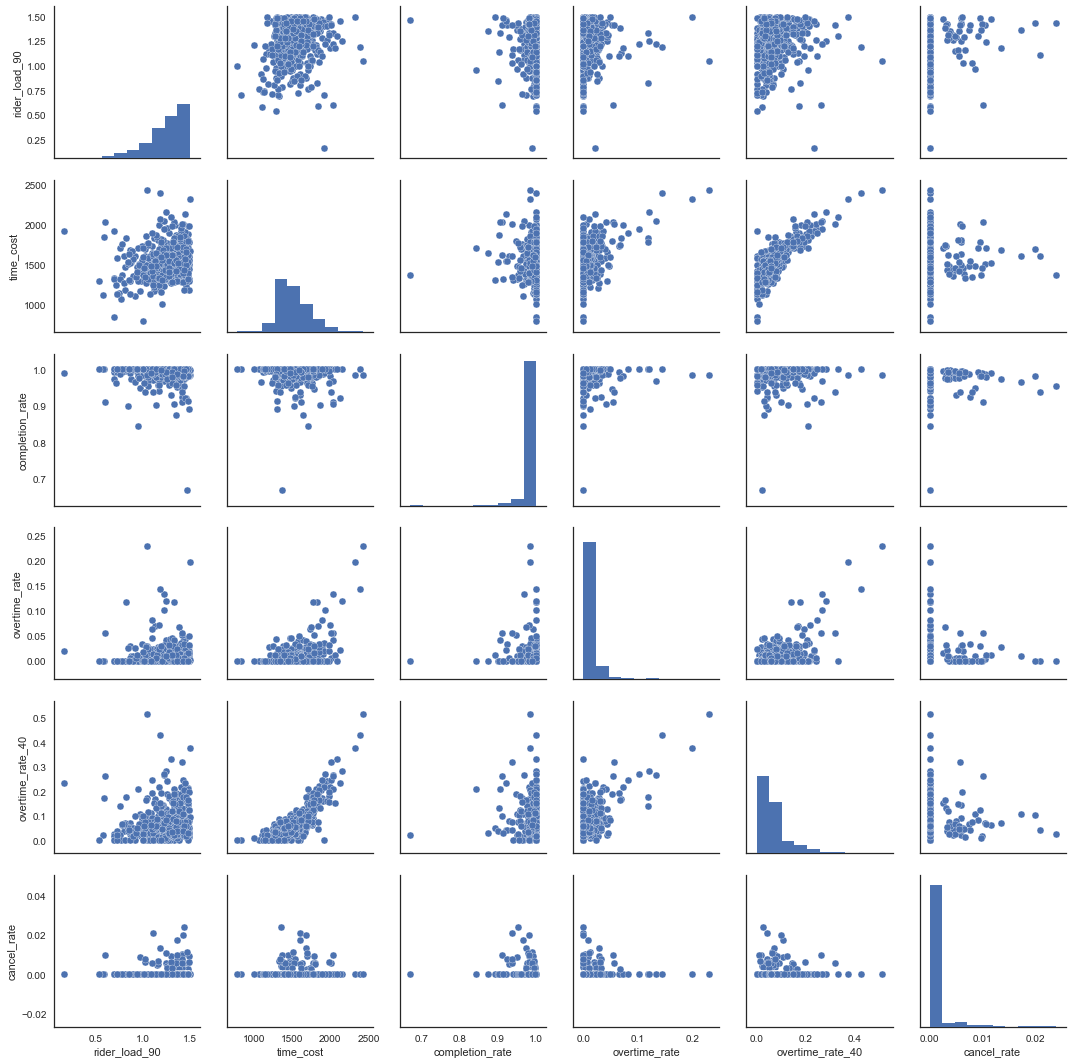

In [60]:
sns.pairplot(df5_beijing[names1])

In [62]:
df5['rider_load_90_1']=round(df5.rider_load_90,1)
df5_beijing['rider_load_90_1']=round(df5_beijing.rider_load_90,1)
df5['rider_loade_90_1'] = df5['rider_load_90_1'].astype('category')
df5_beijing['rider_laod_90_1'] = df5_beijing['rider_load_90_1'].astype('category')

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

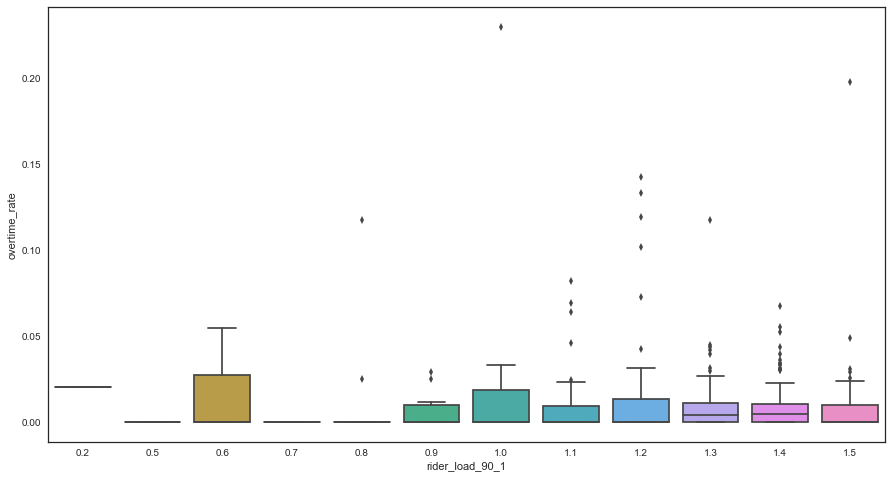

In [63]:
plt.subplots(figsize=(15,8))
sns.boxplot(x="rider_load_90_1", y='overtime_rate',data=df5_beijing)